<a href="https://colab.research.google.com/github/MrtGrd/LEO-satellite-MU-Massive-MIMO/blob/main/BER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

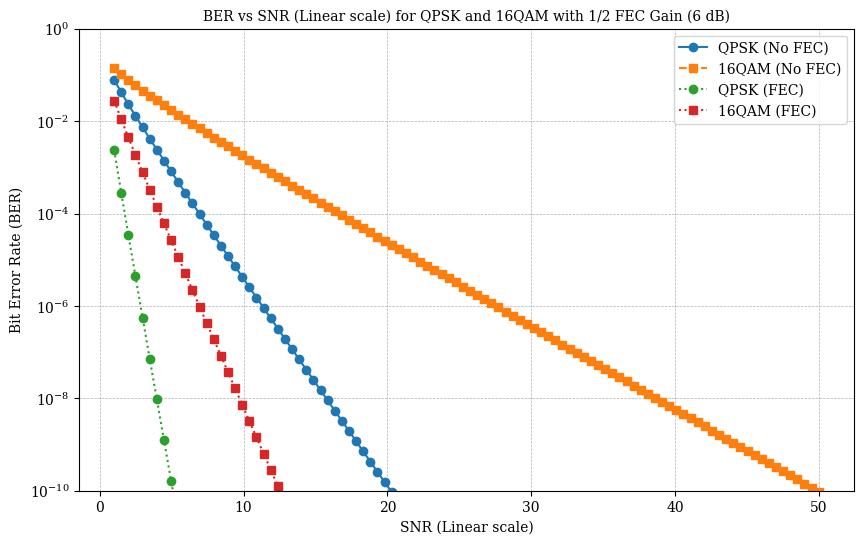

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import matplotlib as mpl

# Set font size for the plot
mpl.rcParams['font.family'] = 'DejaVu Serif'
mpl.rcParams['font.size'] = 10  # Base font size
mpl.rcParams['axes.titlesize'] = 10  # Title font size
mpl.rcParams['axes.labelsize'] = 10  # Axis label font size
mpl.rcParams['xtick.labelsize'] = 10  # X-axis tick label size
mpl.rcParams['ytick.labelsize'] = 10  # Y-axis tick label size
mpl.rcParams['legend.fontsize'] = 10  # Legend font size

# Q-function
def Q(x):
    return 0.5 * erfc(x / np.sqrt(2))

# BER formulas
def ber_qpsk(snr):
    return Q(np.sqrt(2 * snr))

def ber_16qam(snr):
    return (3 / 4) * Q(np.sqrt((4 / 5) * snr))

# Define range of SNR in linear scale (e.g., from 1 to 50)
snr_range_linear = np.linspace(1, 50, 100)

# FEC Gain 6 dB)
fec_gain_dB = 6
fec_gain_linear = 10 ** (fec_gain_dB / 10)  # Convert FEC gain to linear scale

# Adjust SNR with FEC gain (effective SNR)
snr_fec_linear = snr_range_linear * fec_gain_linear

# Calculate BER for QPSK and 16QAM without and with FEC gain
ber_qpsk_values = ber_qpsk(snr_range_linear)
ber_16qam_values = ber_16qam(snr_range_linear)

# Calculate BER for QPSK and 16QAM with FEC gain
ber_qpsk_fec_values = ber_qpsk(snr_fec_linear)
ber_16qam_fec_values = ber_16qam(snr_fec_linear)

# Plot the BER curves
plt.figure(figsize=(10, 6))

# Plot without FEC gain
plt.semilogy(snr_range_linear, ber_qpsk_values, label='QPSK (No FEC)', marker='o', linestyle='-')
plt.semilogy(snr_range_linear, ber_16qam_values, label='16QAM (No FEC)', marker='s', linestyle='--')

# Plot with FEC gain (dotted lines)
plt.semilogy(snr_range_linear, ber_qpsk_fec_values, label='QPSK (FEC)', marker='o', linestyle=':')
plt.semilogy(snr_range_linear, ber_16qam_fec_values, label='16QAM (FEC)', marker='s', linestyle=':')

plt.title("BER vs SNR (Linear scale) for QPSK and 16QAM with 1/2 FEC Gain (6 dB)")
plt.xlabel("SNR (Linear scale)")
plt.ylabel("Bit Error Rate (BER)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.ylim([1e-10, 1])  # Set the y-axis limit to 10^-10 for a cleaner plot
plt.show()
